# Install and Import Libraries

In [ ]:
import numpy as np 
import cv2
import pytesseract
import matplotlib.pyplot as plt
import imutils

In [2]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=0b767c08629f349a972ef55af91b97855e8e499f4a239d3207b26da1519d42d7
  Stored in directory: c:\users\jaswa\appdata\local\pip\cache\wheels\ed\8a\c6\40c7ec06c2dd3df636832537238128a1471bf9c1b6a3a9bf40
Successfully built pytesseract


In [8]:
!pip install imutils

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=3948cca4452236777388efe5fad11a69eaf7eaec4d80358dfe20e24d85efc8c1
  Stored in directory: c:\users\jaswa\appdata\local\pip\cache\wheels\59\1b\52\0dea905f8278d5514dc4d0be5e251967f8681670cadd3dca89
Successfully built imutils


# 1. Read in Image, Grayscale and Blur

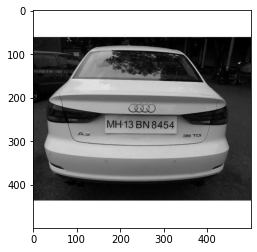

In [51]:
img = cv2.imread('car_image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# 2. Apply filter and find edges for localization

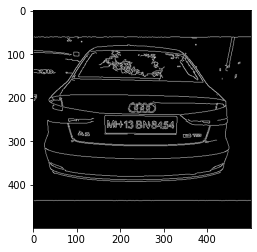

In [52]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

# 3. Find Contours and Apply Mask

In [53]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [54]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [55]:
location

array([[[164, 243]],

       [[164, 284]],

       [[329, 282]],

       [[326, 243]]], dtype=int32)

In [56]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

In [57]:
import numpy as np 

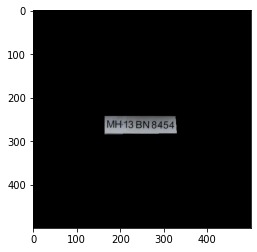

In [58]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [59]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

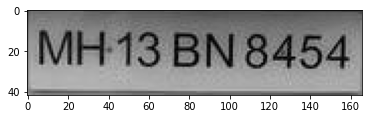

In [60]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

#   4. Use Pytessearct To Read Text

In [61]:
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [62]:
read = pytesseract.image_to_string(cropped_image)


In [63]:
read = "".join(e for e in read if e.isalnum())

In [64]:
print(read)

MH13BN8454


# 5. Render Result

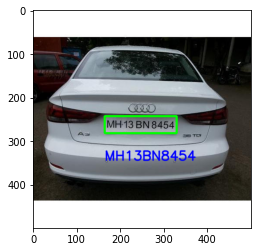

In [65]:
text = read
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))